***

<div style="text-align: center; color: purple;">
  <h1>The project: "Wind Speed Analysis around the Ireland with a view to Wind Farm"</h1>
</div>

***

![File:Wind farm at sunset.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wind_farm_at_sunset.jpg/800px-Wind_farm_at_sunset.jpg)

## Project Description

This project involves analyzing wind speed data across Ireland to assess the potential for wind farm installations. We are using historical weather data from the sources of [Met Éireann](https://www.met.ie/). The analysis involves data cleaning and normalization to ensure accuracy and reliability. 
The key questions to explore include:

**Wind Power Potential by Location**:

- Evaluating the average wind speed over different timeframes (hourly, daily, monthly, annually).
- Considering operational wind speed ranges for turbines to estimate when and where wind farms could generate power effectively.

**Trends in Wind Speed Over Time**:

- Examining long-term trends in wind speed data to predict future patterns, assessing if wind speeds are likely to remain consistent or change over the next decade.

**Seasonal and Temporal Patterns**:

- Identifying seasonal and daily variations in wind speeds to determine optimal times for energy production.

**Exploration of Other Weather Metrics**:

- Investigate additional factors such as rainfall or temperature that might influence wind speed.

**Forecasting Wind Farm Output**:

- Using weather forecasts, estimate wind farm power output for the coming week, integrating turbine efficiency and location data.

**Insights**:

- Explore factors influencing the viability and performance of wind farms in Ireland.

***

## Data Source Exploration

For this project, I conducted research to locate reliable sources of historical weather data for analysis. The following resources were used to gather daily climate and wind speed data:  

- **[Met Éireann Daily Data](https://www.met.ie/climate/available-data/daily-data)**: A trusted source providing detailed historical weather records across Ireland.  
- **[Met Éireann Wikipedia Entry](https://en.wikipedia.org/wiki/Met_%C3%89ireann)**: Used to gain an overview of the organization and its data offerings.  
- **[Irish Open Data Portal - Met Éireann](https://data.gov.ie/organization/meteireann?q=daily+data&sort=score+desc%2C+metadata_modified+desc)**: An open-access repository featuring datasets and metadata for climate and weather research in Ireland.  

***

## Import libraries

- [Pandas](https://pandas.pydata.org/docs/)
- [Numpy](https://numpy.org/doc/stable/reference/index.html#reference)
- [Requests: HTTP for Humans™](https://requests.readthedocs.io/en/latest/)
- [io — Core tools for working with streams](https://docs.python.org/3/library/io.html)
- [os — Miscellaneous operating system interfaces](https://docs.python.org/3/library/os.html)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Choose the style.
plt.style.use("grayscale")

***

## Selection of Data for Analysis

Based on my research and exploration of available data sources, I decided to take a broader approach and conduct an overall analysis of the current weather stations in Ireland and their corresponding data availability. This decision was made to gain a comprehensive understanding of the wind speed variability and its distribution over time. By focusing on these stations, I aim to explore how wind speeds fluctuate across the country, providing a solid foundation for further analysis of wind patterns and trends. This will help shape the direction of my future analyses, enabling more detailed assessments of wind energy potential in Ireland. 
The names and IDs used in the dictionary were collected manually.

In [2]:
# Dictionary of station names and IDs
stations = {
    "Athenry": 1875,
    "Ballyhaise": 675,
    "Belmullet": 2375,
    "Casement": 3723,
    "Claremorris": 2175,
    "Cork Airport": 3904,
    "Dublin Airport": 532,
    "Dunsany": 1375,
    "Finner": 2075,
    "Gurteen": 1475,
    "Johnstown Castle": 1775,
    "Knock Airport": 4935,
    "Malin Head": 1575,
    "Mace Head": 275,
    "Moore Park": 575,
    "Mount Dillon": 1975,
    "Mullingar": 875,
    "Newport": 1175,
    "Oak Park": 375,
    "Roches Point": 1075,
    "Shannon Airport": 518,
    "Sherkin Island": 775,
    "Valentia Observatory": 2275
}


I based my analysis on a base URL for fetching data from various weather stations in Ireland. Using a Python script, I was able to retrieve the relevant data by looping through a list of station names and their respective IDs. The script downloads weather data for each station, skips unnecessary rows, and saves the data into separate CSV files for each station. This process allows for a structured collection of wind speed and other weather parameters across multiple stations, providing a solid foundation for further analysis of wind speed distribution and variability over time.

In [3]:
# Base URL
base_url = "https://cli.fusio.net/cli/climate_data/webdata/dly{}.csv"

# Folder to store data
data_folder = "Data"
os.makedirs(data_folder, exist_ok=True)

# Loop to fetch and save data
for station_name, station_id in stations.items():
    url = base_url.format(station_id)
    print(f"Fetching data from {url} for station: {station_name} (ID: {station_id})...")

    try:
        # Download the data, skipping the first 24 rows
        response = requests.get(url)
        response.raise_for_status()
        station_data = pd.read_csv(StringIO(response.text), skiprows=24, skipinitialspace=True)
        
        # Save to CSV in the Data folder with station name and ID in the filename
        file_path = os.path.join(data_folder, f"{station_name}_station_{station_id}.csv")
        station_data.to_csv(file_path, index=False)
    
    
    except Exception as e:
        print(f"Error fetching data for station {station_name} (ID: {station_id}): {e}")

Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly1875.csv for station: Athenry (ID: 1875)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly675.csv for station: Ballyhaise (ID: 675)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2375.csv for station: Belmullet (ID: 2375)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly3723.csv for station: Casement (ID: 3723)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2175.csv for station: Claremorris (ID: 2175)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly3904.csv for station: Cork Airport (ID: 3904)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly532.csv for station: Dublin Airport (ID: 532)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly1375.csv for station: Dunsany (ID: 1375)...
Fetching data from https://cli.fusio.net/cli/climate_data/webdata/dly2075.csv 

After downloading the data, I reviewed the contents, which revealed that the datasets contained varying numbers of columns across different stations. Despite this, most of the data points were consistent across the stations, allowing for the potential to combine the relevant variables for analysis. As a result, I merged the useful variables, such as wind speed, temperature, and other key weather parameters, into a single dataset, enabling a more comprehensive analysis across all the stations.

**Weather Data Variables**:

1. **date**:  -  00 to 00 utc
2. **rain**:  -  Precipitation Amount (mm)
3. **maxtp**: -  Maximum Air Temperature (C)	 
4. **mintp**: -  Minimum  Air Temperature (C)
5. **cbl**:   -  Mean CBL Pressure (hpa)
6. **wdsp**:  -  Mean Wind Speed (kt)
7. **hm**:    -  Highest ten minute mean wind speed (kt)		              
8. **ddhm**:  -  Wind Direction at max 10 min mean (deg)                  
9. **hg**:    -  Highest Gust (kt)

In [4]:
# Define the columns of interest
columns_of_interest = ['date', 'maxtp', 'mintp', 'rain', 'cbl', 'wdsp', 'hm', 'ddhm', 'hg']

After selecting the relevant columns, the data was combined into a single file, with additional columns added for the station name and its ID.

In [5]:
# Reverse the dictionary for quick lookup
station_ids_to_names = {v: k for k, v in stations.items()}

# Output file path
output_file = "All_stations_data.csv"

# Initialize an empty list for combined data
combined_data = []

# Loop through all files in the folder
for file_name in os.listdir(data_folder):
    try:
        # Extract station ID from the file name
        station_id = int(file_name.split('_')[-1].split('.')[0])
        station_name = station_ids_to_names.get(station_id, "Unknown")
        
        # Read the data and add columns
        file_path = os.path.join(data_folder, file_name)
        station_data = pd.read_csv(file_path)[columns_of_interest]
        station_data["Station_ID"] = station_id
        station_data["Station_Name"] = station_name
        
        # Add the data to the combined list
        combined_data.append(station_data)
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Combine and save the final DataFrame
pd.concat(combined_data, ignore_index=True).to_csv(output_file, index=False)
print(f"All data saved to {output_file}")


All data saved to All_stations_data.csv


Now that I have a consolidated dataset, we can begin exploring and analyzing it using appropriate tools to understand its structure, assess data completeness, and derive overall comparative statistics.

In [6]:
# Load the combined dataset into a Pandas DataFrame
df_all = pd.read_csv("All_stations_data.csv", low_memory=False, date_format = 'mixed', parse_dates=['date'])

# Show
df_all.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg,Station_ID,Station_Name
0,2010-02-26,7.6,1.8,0.1,983.8,8.3,14.0,230.0,20.0,1875,Athenry
1,2010-02-27,8.6,-2.4,0.1,985.0,4.3,9.0,170.0,14.0,1875,Athenry
2,2010-02-28,8.8,-3.3,0.0,992.9,4.9,17.0,290.0,24.0,1875,Athenry
3,2010-03-01,10.0,-4.3,0.0,1006.3,2.3,6.0,50.0,8.0,1875,Athenry
4,2010-03-02,8.2,-1.8,0.0,1014.4,7.1,12.0,120.0,19.0,1875,Athenry



In the dataset, wind speed is originally provided in [Knots](https://en.wikipedia.org/wiki/Knot_(unit)), a unit commonly used in meteorology and aviation. To facilitate analysis it may be more practical to express wind speed in meters per second (m/s). Therefore, I have converted the wind speed values from knots to m/s and updated the corresponding column name to reflect the new units.

In [7]:
df_all['wdsp'] = df_all['wdsp'] * 0.514444  # Convert wind speed from knots to m/s

# Ensure data consistency for later analysis
df_all.rename(columns={'wdsp': 'wdsp_mps'}, inplace=True)  # Rename column to reflect the new units

# Print a sample of the dataset to confirm conversion
print(df_all[['Station_Name', 'date', 'wdsp_mps']].head())

  Station_Name       date  wdsp_mps
0      Athenry 2010-02-26  4.269885
1      Athenry 2010-02-27  2.212109
2      Athenry 2010-02-28  2.520776
3      Athenry 2010-03-01  1.183221
4      Athenry 2010-03-02  3.652552


Next, I examine the time periods for which data is available and assess how much data is present. This analysis is performed separately for each station, allowing for a detailed understanding of the temporal coverage and data quantity for each location.

In [8]:
# Extract the year from the date
df_all['year'] = df_all['date'].dt.year

# Group by station and find the minimum and maximum year
station_year_range = df_all.groupby("Station_Name")['year'].agg(['min', 'max'])

# Add the number of records for each station
station_record_count = df_all.groupby("Station_Name").size()

# Merge the year range information and the record count into one table
station_summary = station_year_range.join(station_record_count.rename('Record_Count'))

# Sort the summary by the 'min' (minimum year) in ascending order
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)

print(station_summary_sorted)


                       min   max  Record_Count
Station_Name                                  
Valentia Observatory  1942  2024         30284
Dublin Airport        1942  2024         30285
Shannon Airport       1945  2024         28946
Claremorris           1950  2024         27347
Roches Point          1955  2024         21436
Malin Head            1955  2024         25417
Belmullet             1956  2024         24912
Cork Airport          1962  2024         22980
Casement              1964  2024         22250
Mullingar             1973  2024         18651
Knock Airport         1996  2024         10347
Mace Head             2003  2024          7728
Moore Park            2003  2024          7719
Oak Park              2003  2024          7708
Ballyhaise            2003  2024          7705
Sherkin Island        2004  2024          7504
Mount Dillon          2004  2024          7381
Newport               2005  2024          7216
Dunsany               2006  2024          6780
Gurteen      

The output represents a summary of meteorological data availability across various stations in Ireland. Each row corresponds to a specific weather station and includes the following columns:

**Station_Name**: The name of the meteorological station.
**Min Year (Min)**: The earliest year for which data is available at this station.
**Max Year (Max)**: The most recent year for which data is available at this station.
**Record_Count**: The total number of data records collected for this station.
**Observations**:
The longest-running station in the dataset is **Valentia Observatory**, with records from 1942 to 2024.
Newer stations like **Athenry** and **Finner** started recording data only in the last two decades.
Record counts vary significantly across stations, reflecting differences in operation periods and data completeness.

Based on the previous output, it is clear that a temporal filtering of the data is necessary for consistent comparisons across common metrics. Therefore, I proceed by selecting data starting from January 1, 2010. This choice is guided by the observation that, from this date onward, almost all stations have data available, ensuring a uniform basis for analysis.

In [9]:
# Filter data starting from January 1, 2010
df_2010_2024 = df_all[df_all['date'] >= '2010-01-01']

df_2010_2024.head()

,date,maxtp,mintp,rain,cbl,wdsp_mps,hm,ddhm,hg,Station_ID,Station_Name,year
0,2010-02-26,7.6,1.8,0.1,983.8,4.269885,14.0,230.0,20.0,1875,Athenry,2010
1,2010-02-27,8.6,-2.4,0.1,985.0,2.212109,9.0,170.0,14.0,1875,Athenry,2010
2,2010-02-28,8.8,-3.3,0.0,992.9,2.520776,17.0,290.0,24.0,1875,Athenry,2010
3,2010-03-01,10.0,-4.3,0.0,1006.3,1.183221,6.0,50.0,8.0,1875,Athenry,2010
4,2010-03-02,8.2,-1.8,0.0,1014.4,3.652552,12.0,120.0,19.0,1875,Athenry,2010



After applying the filter to select data from 2010 onward, I rerun the grouping code to ensure the time intervals for which data is available. 

In [10]:

station_year = df_2010_2024.groupby("Station_Name")['year'].agg(['min', 'max'])
station_record_count = df_2010_2024.groupby("Station_Name").size()
station_summary = station_year.join(station_record_count.rename('Record_Count'))
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)
print(station_summary_sorted)

                       min   max  Record_Count
Station_Name                                  
Athenry               2010  2024          5392
Shannon Airport       2010  2024          5448
Roches Point          2010  2024          5448
Oak Park              2010  2024          5445
Newport               2010  2024          5445
Mullingar             2010  2024          5448
Mount Dillon          2010  2024          5447
Moore Park            2010  2024          5448
Malin Head            2010  2024          5448
Mace Head             2010  2024          5447
Sherkin Island        2010  2024          5448
Knock Airport         2010  2024          5448
Gurteen               2010  2024          5448
Dunsany               2010  2024          5448
Dublin Airport        2010  2024          5448
Cork Airport          2010  2024          5448
Claremorris           2010  2024          5448
Casement              2010  2024          5448
Belmullet             2010  2024          5448
Ballyhaise   

***

## Dataset Exploration

Now that I have the necessary filtered dataset, we can proceed with a detailed exploration. This step involves understanding the structure, completeness, and consistency of the data.

To get an overview of the dataset's structure and check for missing values or data type inconsistencies we implement .info(). This provides a summary of the dataset, including the number of rows and columns, data types of each column, and the count of non-null values for each column.

In [11]:
df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124847 entries, 0 to 345103
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          124847 non-null  datetime64[ns]
 1   maxtp         124835 non-null  float64       
 2   mintp         124834 non-null  float64       
 3   rain          124819 non-null  float64       
 4   cbl           124726 non-null  float64       
 5   wdsp_mps      124801 non-null  float64       
 6   hm            124833 non-null  float64       
 7   ddhm          124830 non-null  float64       
 8   hg            124834 non-null  float64       
 9   Station_ID    124847 non-null  int64         
 10  Station_Name  124847 non-null  object        
 11  year          124847 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1), object(1)
memory usage: 11.9+ MB


Count the total number of NaN (missing) values for each column in the dataset.

In [ ]:
# Count missing values
df_2010_2024.isna().sum()

date              0
maxtp            12
mintp            13
rain             28
cbl             121
wdsp_mps         46
hm               14
ddhm             17
hg               13
Station_ID        0
Station_Name      0
year              0
dtype: int64

Group the dataset by station name and calculate the number of missing values per column for each station.

In [13]:
# Count NaN values per Station_ID and across all columns
nan_counts_per_station = df_2010_2024.groupby('Station_Name').apply(lambda x: x.isna().sum())

A heatmap is generated to visualize the distribution of missing data across all columns and stations. It helps in identifying patterns in missing data (e.g., some stations may lack certain types of data entirely), facilitates decisions on handling missing values (e.g., data imputation, removal, or filling).

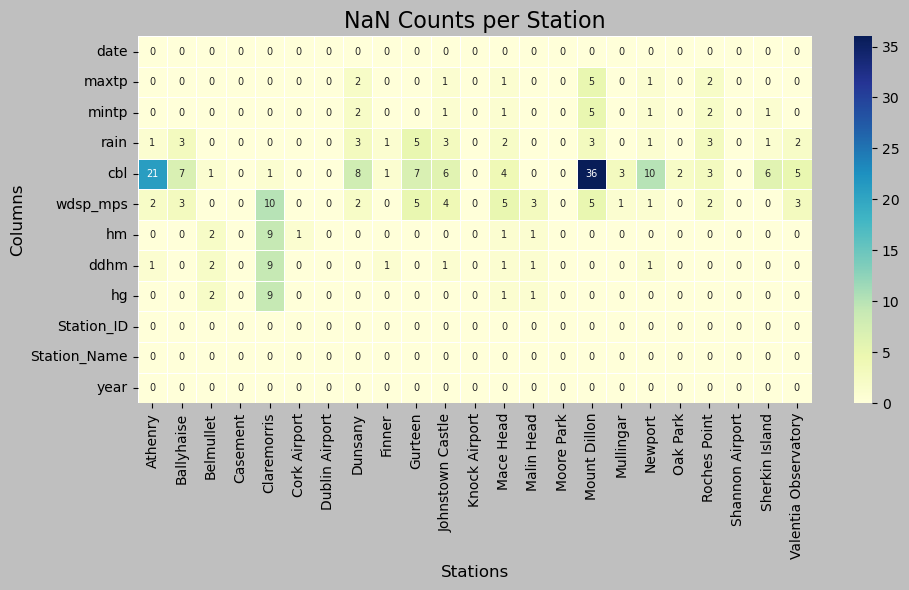

In [14]:
# Create a heatmap of NaN counts per station and column
plt.figure(figsize=(10, 6))  # the size
sns.heatmap(nan_counts_per_station.T, cmap='YlGnBu', annot=True, annot_kws={'size': 7}, fmt='d', linewidths=0.5)

plt.title("NaN Counts per Station", fontsize=16)
plt.xlabel("Stations", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)   

plt.tight_layout()

Analyzing the heatmap and focusing on the variable of interest, wind speed (wdsp_mps), I observe some missing data. However, the amount of missing data is relatively small and manageable. I need to deal with it anyway. First, I сreate a copy of the dataset to ensure that modifications do not inadvertently affect the original data or other references to the dataframe. Then, I fill the missing values in the `wdsp_mps` column with the median value of the existing data for that column. This ensures that the imputed values are representative of the central tendency of the data, minimizing bias introduced during the filling process. 

I used median instead of dropping the rows because the dataset has a temporal structure. Although the amount of missing data is very small, removing rows could disrupt trends, seasonal patterns, or other temporal analyses essential for studying wind speed variations over time.

In [ ]:
# Copy the dataset
df_2010_2024 = df_2010_2024.copy()

# Fill missing values with the median
df_2010_2024['wdsp_mps'] = df_2010_2024['wdsp_mps'].fillna(df_2010_2024['wdsp_mps'].median())

In [ ]:
# Ensure the missing values are gone
df_2010_2024['wdsp_mps'].isna().sum()

0

In [17]:
# This line sets the 'date' column as the index for df, modifying the DataFrame in place.
df_2010_2024.set_index('date', inplace=True)

In [18]:
# Group by Station_Name and calculate the monthly mean for wind speed
monthly_mean_wind_speed = df_2010_2024.groupby("Station_Name")['wdsp_mps'].resample('M').mean()

Wind turbines used in large-scale wind farms typically have operational wind speed ranges that determine when they can generate electricity safely and efficiently. These ranges are as follows:

Cut-in Wind Speed: This is the minimum wind speed at which turbines begin to operate. It is generally around 3–5 m/s (approximately 10.8–18 km/h).

Rated Wind Speed: This is the wind speed at which turbines produce their maximum power output. It is usually between 12–15 m/s (approximately 43–54 km/h).

Cut-out Wind Speed: This is the maximum wind speed at which turbines shut down to avoid damage. This threshold is typically around 20–25 m/s (approximately 72–90 km/h)

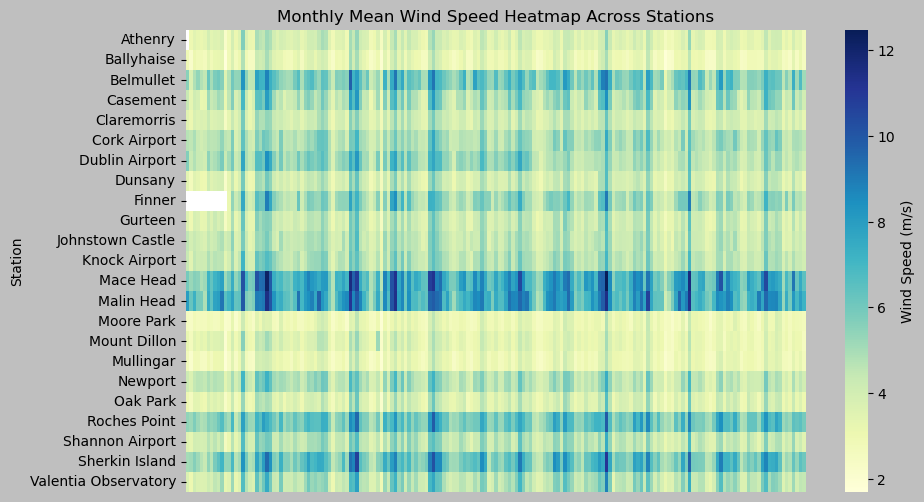

In [19]:
heatmap_data = monthly_mean_wind_speed.reset_index().pivot(index='Station_Name', columns='date', values='wdsp_mps')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Wind Speed (m/s)'})
plt.title("Monthly Mean Wind Speed Heatmap Across Stations")
plt.xlabel("")  # Remove x-axis label
plt.xticks([])  # Remove x-axis tick labels
plt.ylabel("Station");


c:\Users\uliya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


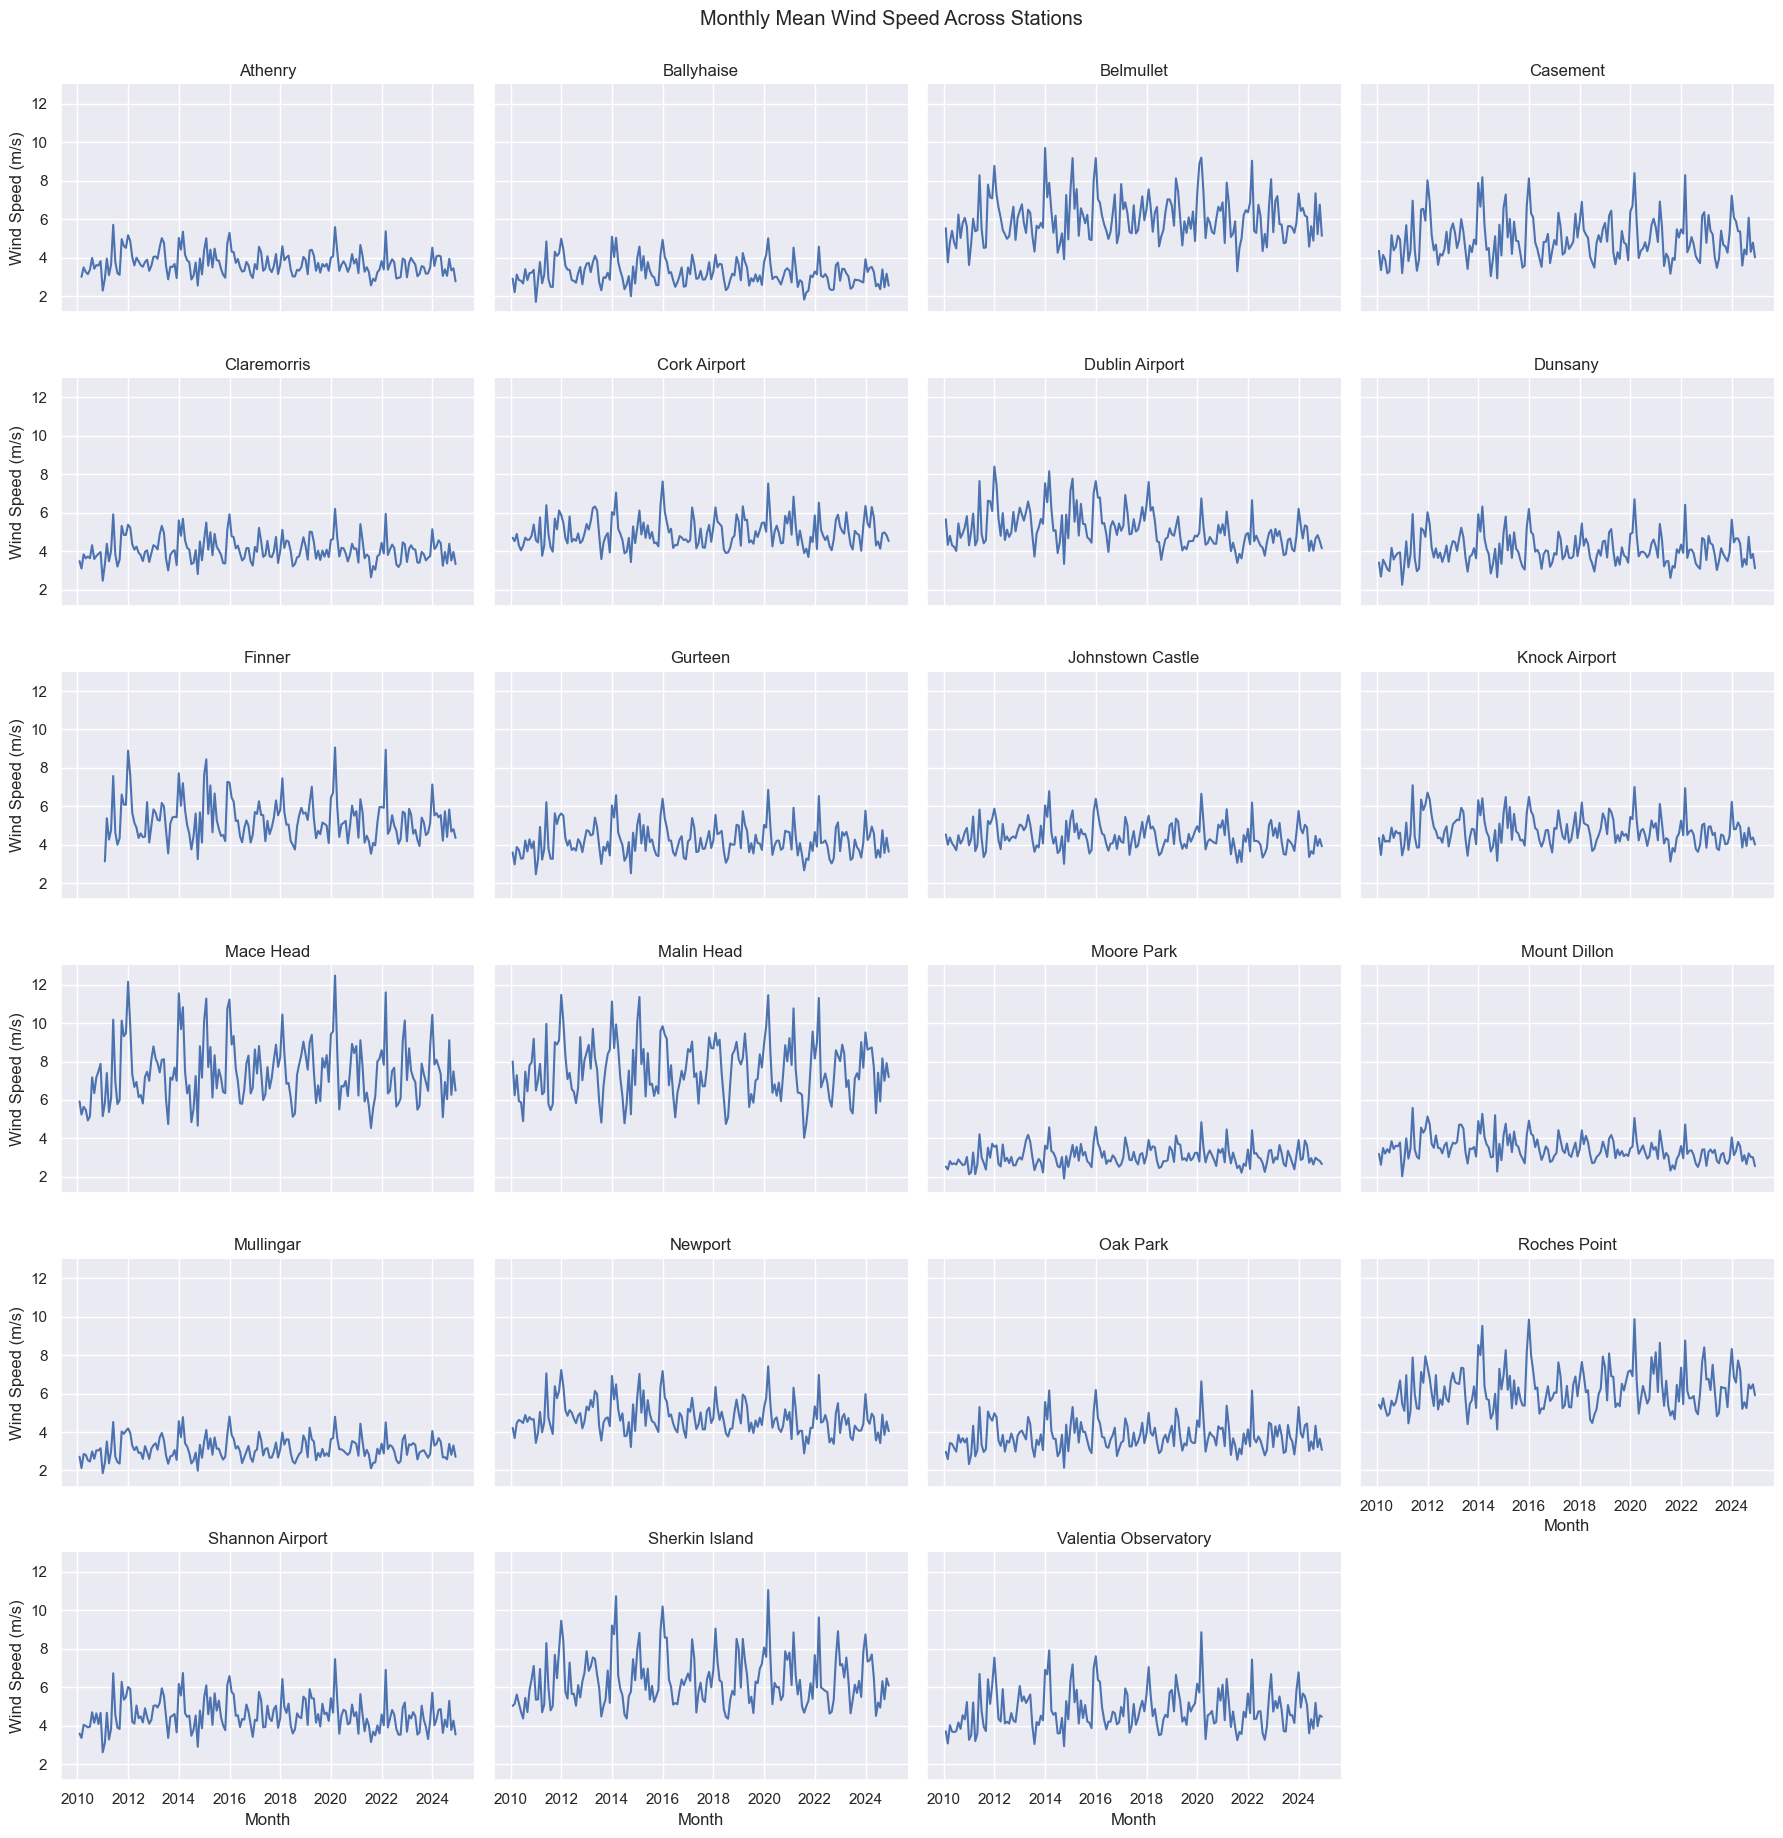

In [26]:
data_for_plot = monthly_mean_wind_speed.reset_index()

g = sns.FacetGrid(data_for_plot, col="Station_Name", col_wrap=4, height=3, aspect=1.5, sharey=True)
g.map(sns.lineplot, "date", "wdsp_mps")
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Wind Speed (m/s)")
g.fig.suptitle("Monthly Mean Wind Speed Across Stations", y=1.02)
sns.set(style="whitegrid")